<a href="https://colab.research.google.com/github/sandroormeno/Supervised-learning-MeetUp-Galileo/blob/main/4 clasificacion de imágenes de autos con convoluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Ponencia clasificacón de imagenes"

/content/drive/MyDrive/Colab Notebooks/Ponencia clasificacón de imagenes


In [ ]:
#!unzip autos.zip

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Ponencia clasificacón de imágenes'
DATA = './autos'
DATAPATH = PATH + DATA

In [ ]:
batch_size = 16
img_height = 150
img_width = 150
epochs=5

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  DATA,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 332 files belonging to 3 classes.
Using 266 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  DATA,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 332 files belonging to 3 classes.
Using 66 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['audi', 'ferrari', 'volkswagen']


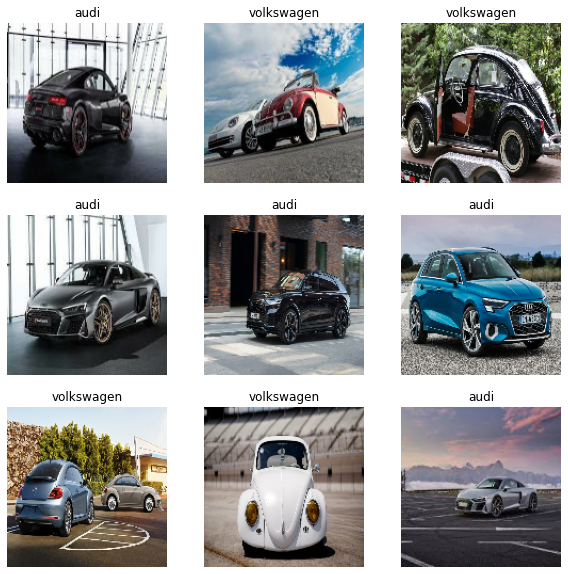

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(16, 150, 150, 3)
(16,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#normalization_layer = layers.Rescaling(1./255)

In [ ]:
num_classes = 3

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/5
17/17 [==============================] - 35s 984ms/step - loss: 1.2094 - accuracy: 0.3233 - val_loss: 1.0986 - val_accuracy: 0.3788
Epoch 2/5
17/17 [==============================] - 6s 380ms/step - loss: 1.0986 - accuracy: 0.3158 - val_loss: 1.0986 - val_accuracy: 0.3788
Epoch 3/5
17/17 [==============================] - 6s 378ms/step - loss: 1.0986 - accuracy: 0.3158 - val_loss: 1.0986 - val_accuracy: 0.3788
Epoch 4/5
17/17 [==============================] - 6s 374ms/step - loss: 1.0986 - accuracy: 0.3158 - val_loss: 1.0986 - val_accuracy: 0.3788
Epoch 5/5
17/17 [==============================] - 6s 377ms/step - loss: 1.0986 - accuracy: 0.3158 - val_loss: 1.0986 - val_accuracy: 0.3788


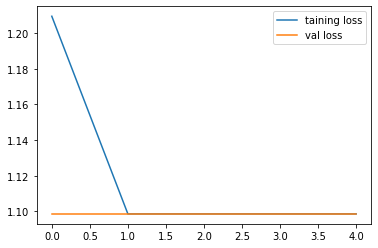

In [ ]:
plt.figure()
plt.plot(np.arange(0,epochs,), history.history['loss'], label='taining loss')
plt.plot(np.arange(0,epochs,), history.history['val_loss'], label='val loss')
plt.legend(loc='upper right')
plt.show()


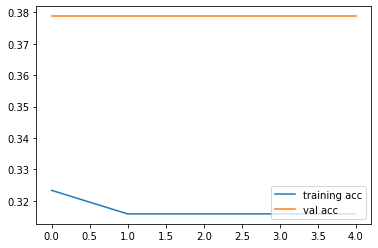

In [ ]:
plt.figure()
plt.plot(np.arange(0,epochs,), history.history['accuracy'], label='training acc')
plt.plot(np.arange(0,epochs,), history.history['val_accuracy'], label='val acc')
plt.legend(loc='lower right')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    # layers.RandomFlip("vertical",input_shape=(img_height,img_width,3)),
    
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.3),
  ]
)


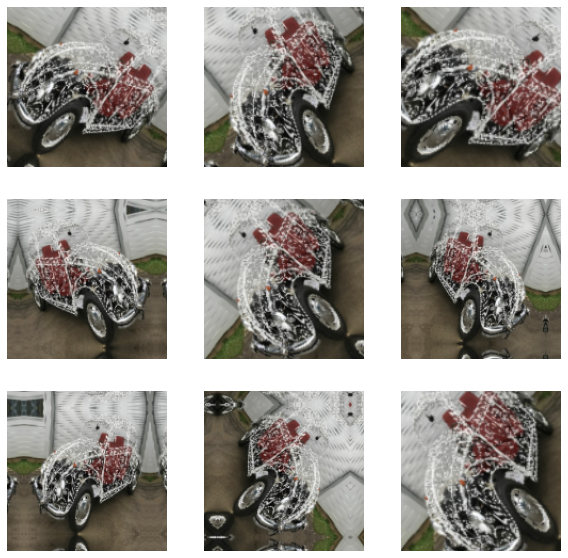

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 5
history = model.fit( train_ds, validation_data=val_ds, epochs=epochs)


Epoch 1/5
17/17 [==============================] - 8s 440ms/step - loss: 1.2061 - accuracy: 0.3759 - val_loss: 1.0563 - val_accuracy: 0.4242
Epoch 2/5
17/17 [==============================] - 7s 430ms/step - loss: 1.0106 - accuracy: 0.4699 - val_loss: 0.9836 - val_accuracy: 0.3939
Epoch 3/5
17/17 [==============================] - 7s 427ms/step - loss: 0.9827 - accuracy: 0.5038 - val_loss: 0.9393 - val_accuracy: 0.5000
Epoch 4/5
17/17 [==============================] - 7s 425ms/step - loss: 0.9718 - accuracy: 0.5188 - val_loss: 0.9388 - val_accuracy: 0.5000
Epoch 5/5
17/17 [==============================] - 7s 428ms/step - loss: 0.8974 - accuracy: 0.5827 - val_loss: 0.9718 - val_accuracy: 0.5455


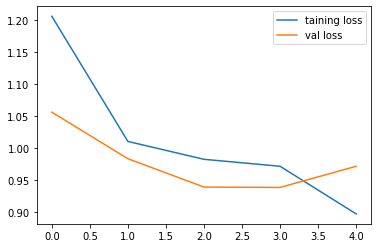

In [ ]:
plt.figure()
plt.plot(np.arange(0,epochs,), history.history['loss'], label='taining loss')
plt.plot(np.arange(0,epochs,), history.history['val_loss'], label='val loss')
plt.legend(loc='upper right')
plt.show()


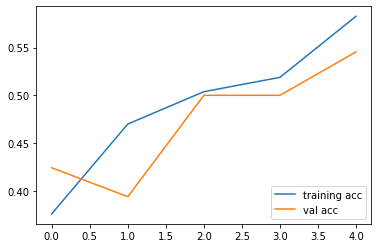

In [ ]:
plt.figure()
plt.plot(np.arange(0,epochs,), history.history['accuracy'], label='training acc')
plt.plot(np.arange(0,epochs,), history.history['val_accuracy'], label='val acc')
plt.legend(loc='lower right')
plt.show()